
# Measurements and Instrument Characteristics

**Date:** 2025-09-10

This notebook introduces key concepts in measurement science, covering accuracy, precision, resolution, linearity, step response, sensitivity, metrology, uncertainty, and calibration.  
It mixes theory with small Python demos.



## 1. Accuracy

- **Accuracy** describes how close a measured value is to the true value.  
- **Inaccuracy** or **bias** is the systematic difference between the measurement and the true value.

**Example:**  
If the true temperature is 25.0 °C and your thermometer reads 24.8 °C, the accuracy is high (error = -0.2 °C).



## 2. Precision

- **Precision** is the closeness of repeated measurements. There are two specific cases depending on how the repetition is performed:  
  - **Repeatability**: same operator, same instrument, short timespan.  
  - **Reproducibility**: different operators/instruments/locations.  

A system can be precise but not accurate (clustered measurements far from true value).


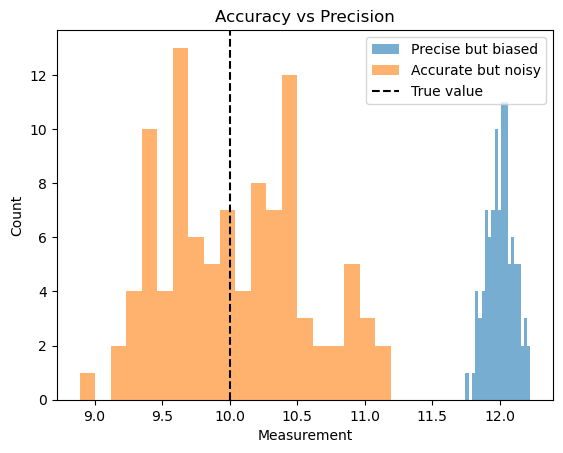

In [1]:
import numpy as np
import matplotlib.pyplot as plt

true_value = 10.0
np.random.seed(0)

# Precise but biased
data_precise = true_value + 2.0 + 0.1*np.random.randn(100)
# Accurate but not precise
data_accurate = true_value + 0.5*np.random.randn(100)

plt.hist(data_precise, bins=20, alpha=0.6, label='Precise but biased')
plt.hist(data_accurate, bins=20, alpha=0.6, label='Accurate but noisy')
plt.axvline(true_value, color='k', linestyle='--', label='True value')
plt.legend(); plt.xlabel("Measurement"); plt.ylabel("Count"); plt.title("Accuracy vs Precision")
plt.show()

> ### Case Study: Buying 10 Digital Thermometers
>
> **Repeatability:**
> - You take **one thermometer** out of the box and measure the same 25 °C water bath five times in a row.  
> - Readings: 24.9, 25.0, 25.0, 25.1, 25.0 °C → very consistent.  
> - This demonstrates **repeatability**: how stable one instrument is under the same conditions.  
> - Manufacturer’s spec: *Repeatability ±0.1 °C under identical conditions*.  
>
> **Reproducibility:**
> - You now test **all ten thermometers** on the same 25 °C water bath.  
> - Results cluster between 24.7 °C and 25.3 °C.  
> - Variation comes from small differences in calibration, sensor tolerances, or assembly.  
> - This demonstrates **reproducibility**: agreement across instruments, operators, or labs.  
> - Manufacturer’s spec (often given as overall accuracy): *±0.3 °C across units and environments*.  



## 3. Resolution

- The smallest change in input signal that produces a detectable change in output.  
- Example: A digital thermometer with 0.1 °C resolution cannot show smaller variations.



## 4. Linearity

- A sensor is **linear** if output is directly proportional to input.  
- Many sensors are approximately linear within a certain range.


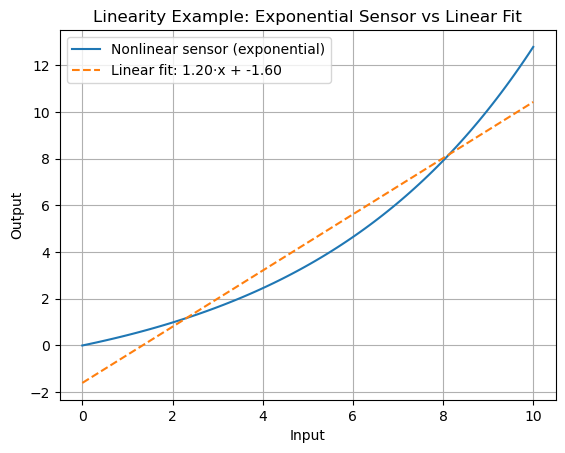

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Input range
x = np.linspace(0, 10, 100)

# True nonlinear sensor model (exponential response)
y_nonlinear = 2 * (np.exp(0.2 * x) - 1)

# Best linear fit to the nonlinear curve
coeffs = np.polyfit(x, y_nonlinear, deg=1)
y_linear_fit = np.polyval(coeffs, x)

plt.plot(x, y_nonlinear, label="Nonlinear sensor (exponential)")
plt.plot(x, y_linear_fit, '--', label=f"Linear fit: {coeffs[0]:.2f}·x + {coeffs[1]:.2f}")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.title("Linearity Example: Exponential Sensor vs Linear Fit")
plt.grid(True)
plt.show()


## 5. Step Response

When a step change is applied, first-order systems respond exponentially:  

$$
y(t) = 1 - e^{-t/\tau}
$$

- After 1 τ → 63%  
- After 2 τ → 86%  
- After 3 τ → 95%  
- After 5 τ → 99%


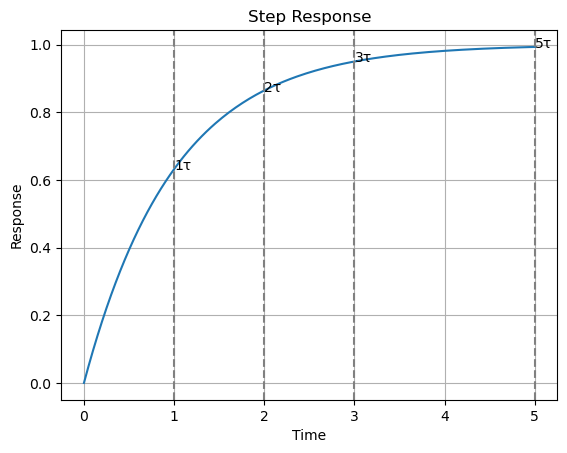

In [3]:
t = np.linspace(0, 5, 200)
tau = 1.0
y = 1 - np.exp(-t/tau)

plt.plot(t, y, label="Step response")
for mult, pct in [(1,0.63),(2,0.86),(3,0.95),(5,0.99)]:
    plt.axvline(mult*tau, color='gray', linestyle='--')
    plt.text(mult*tau, pct, f"{mult}τ")
plt.xlabel("Time"); plt.ylabel("Response"); plt.title("Step Response"); plt.grid(True); plt.show()


## 6. Sensitivity to Disturbances

Measurement devices can be affected by external factors:  
- Temperature, humidity, vibration, gravity  
- Electromagnetic interference  
- Sensor aging

Good instruments specify environmental limits in datasheets.



## 7. Metrology

- **Scientific metrology**: realization of SI units, fundamental standards.  
- **Industrial metrology**: calibration of instruments used in industry.  
- **Legal metrology**: measurements with legal/economic impact (e.g., trade, safety).

```mermaid
flowchart TD
  SI[SI Units] --> NMI[National Metrology Institute]
  NMI --> CalLab[Accredited Calibration Labs]
  CalLab --> Industry[Industry Instruments]
```



## 8. Measurement Uncertainty

In formal metrology (ISO/VIM/GUM) **accuracy** is a _qualitative concept_ → you cannot assign it a number. Instead, you quantify **uncertainty (epätarkkuus)**, which includes both random and systematic effects.
In industry,  datasheets almost always specify “accuracy” as a _quantitative performance metric_, even though they are really giving something closer to maximum permissible error (MPE) or an uncertainty bound.

> Typical datasheet statements:  
> “Accuracy: ±0.5 °C”  
> “Accuracy: ±0.1% of full scale ± 1 digit”  
> What they mean is: the measurement result will not differ from the true value by more than this tolerance under specified conditions.

### Factors of uncertainty:  
- **Systematic error** → predictable bias. Affects instrument accuracy. Can be calibrated.
- **Random error** → unpredictable scatter. Affects instrument precision. Can calculate averages if conditions are stable.

### Types of uncertainty
- **Type A**: estimated by statistical analysis of series of observations.  
- **Type B**: estimated by other means (manufacturer specs, expert judgment).

### Reporting Uncertainty

When you report a measurement, you should **always give two numbers**:
- the measured value
- an indication of how uncertain it is

This is usually written as:

**25.0 °C ± 0.4 °C**

---

The “±” part is not just a guess — it usually comes from the **scatter of repeated measurements**, which often follows a **Gaussian (normal) distribution**.

- If we write **± one standard deviation (σ)** → about **68%** of the time the true value lies in that interval.
- To be more confident, we can multiply σ by a **coverage factor (k):**
  - k = 1 → ~68% confidence
  - k = 2 → ~95% confidence (most common)
  - k = 3 → ~99.7% confidence

---

**Example:**

- If you measured temperature several times and found an average of 25.0 °C with σ = 0.2 °C:  
  - Can be reported as 25.0 ± 0.2 °C (k = 1)  or 25.0 ± 0.4 °C (k = 2) or 25.0 ± 0.6 °C (k = 3)


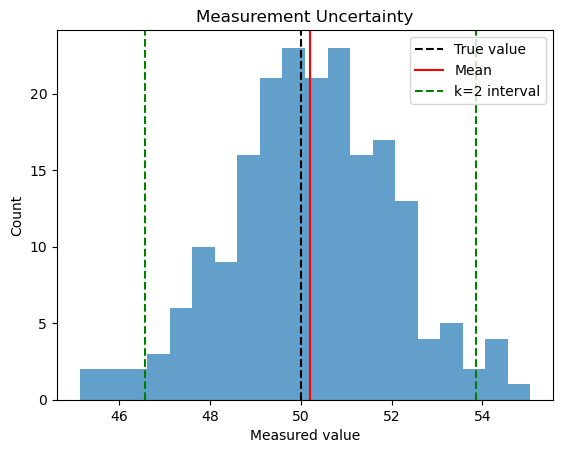

Mean = 50.21, Std = 1.82


In [4]:
np.random.seed(1)
true_val = 50
measurements = true_val + np.random.normal(0, 2, 200)
mean = np.mean(measurements)
std = np.std(measurements, ddof=1)

plt.hist(measurements, bins=20, alpha=0.7)
plt.axvline(true_val, color='k', linestyle='--', label="True value")
plt.axvline(mean, color='r', label="Mean")
plt.axvline(mean-2*std, color='g', linestyle='--', label="k=2 interval")
plt.axvline(mean+2*std, color='g', linestyle='--')
plt.legend(); plt.xlabel("Measured value"); plt.ylabel("Count"); plt.title("Measurement Uncertainty");
plt.show()

print(f"Mean = {mean:.2f}, Std = {std:.2f}")


## 9. Calibration

- Relating instrument output to known reference values.  
- Can use polynomial, exponential, or piecewise linear models.  
- Calibration introduces its own uncertainty.

Example: calibration curve of a nonlinear sensor.


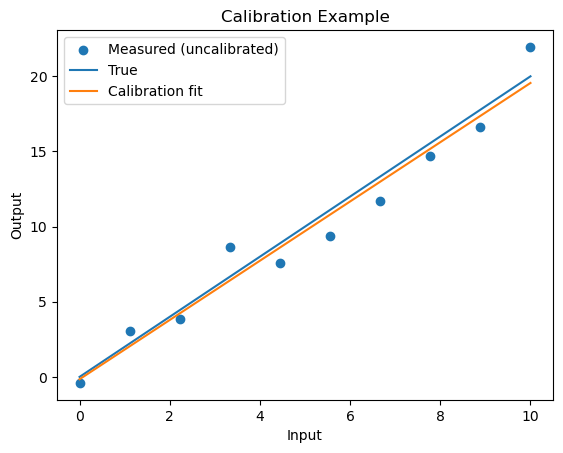

In [5]:
x = np.linspace(0, 10, 10)
y_true = 2*x
y_measured = y_true + np.random.normal(0, 1.0, len(x))

coeffs = np.polyfit(x, y_measured, deg=1)
y_fit = np.polyval(coeffs, x)

plt.scatter(x, y_measured, label="Measured (uncalibrated)")
plt.plot(x, y_true, label="True")
plt.plot(x, y_fit, label="Calibration fit")
plt.xlabel("Input"); plt.ylabel("Output"); plt.legend(); plt.title("Calibration Example"); plt.show()


## 10. Summary

- **Accuracy** = closeness to true value  
- **Precision** = repeatability  
- **Resolution** = smallest detectable change  
- **Linearity** = proportionality between input/output  
- **Step response** = dynamic behavior (time constant τ)  
- **Sensitivity** = influence of environment  
- **Metrology** = framework of measurement science  
- **Uncertainty** = quantification of doubt in measurement  
- **Calibration** = aligning instrument to references  


## Exercises

### A. Basic concepts

A1. You measure the temperature of a stable water bath with one thermometer 10 times in a row:

24.9, 25.0, 25.0, 24.8, 25.1, 25.0, 24.9, 25.0, 25.1, 24.9 °C

a) What is the mean temperature?

Mean = (24.9 + 25.0 + 25.0 + 24.8 + 25.1 + 25.0 + 24.9 + 25.0 + 25.1 + 24.9) / 10 = **24.97 °C**


In [6]:
data = [24.9, 25.0, 25.0, 24.8, 25.1, 25.0, 24.9, 25.0, 25.1, 24.9]
mean = np.mean(data)

print("Mean temperature =", round(mean, 2), "°C")

Mean temperature = 24.97 °C



b) What is the standard deviation of these readings?


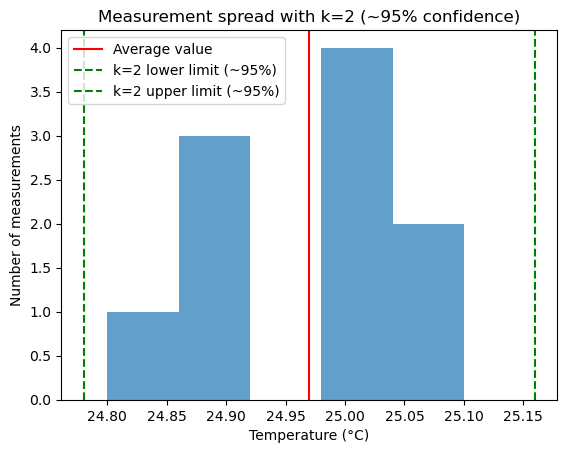

Standard deviation = 0.095 °C


In [7]:
data = [24.9, 25.0, 25.0, 24.8, 25.1, 25.0, 24.9, 25.0, 25.1, 24.9]
mean = np.mean(data)
std = np.std(data, ddof=1)

plt.hist(data, bins=5, alpha=0.7)
plt.axvline(mean, color='r', label="Average value")
plt.axvline(mean-2*std, color='g', linestyle='--', label="k=2 lower limit (~95%)")
plt.axvline(mean+2*std, color='g', linestyle='--', label="k=2 upper limit (~95%)")
plt.legend()
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of measurements")
plt.title("Measurement spread with k=2 (~95% confidence)")
plt.show()

print("Standard deviation =", round(std, 3), "°C")

**Interpretation:** The standard deviation of the measurements is 0.09 °C. On the graph with k=2 (±2·std, ~95% range), all values fall inside the interval. This shows in a clear way that the spread is small and the thermometer is stable.

c) Do these results demonstrate repeatability or reproducibility? Why?

These results show **repeatability**, because all measurements were made with the same thermometer under the same conditions.

d) How would you report the result with ± uncertainty at k=2 (≈95% confidence)?

The result can be reported as **24.97 °C ± 0.19 °C** (k=2, ≈95% confidence), because standard deviation is 0.09 °C for k=1, and for k=2 we multiply by 2 → 0.19 °C.



A2. Suppose your company manufactures 5 copies of the same thermometer model.
When measuring the same 25.0 °C water bath, the instruments report:

24.8, 25.0, 25.3, 24.9, 25.1 °C

a) What is the mean across all instruments?

Mean = (24.8 + 25.0 + 25.3 + 24.9 + 25.1) / 5 = **25.02 °C**

In [8]:
data = [24.8, 25.0, 25.3, 24.9, 25.1]
mean = np.mean(data)

print("Mean temperature =", round(mean, 2), "°C")

Mean temperature = 25.02 °C


b) What is the standard deviation of the device-to-device variation?

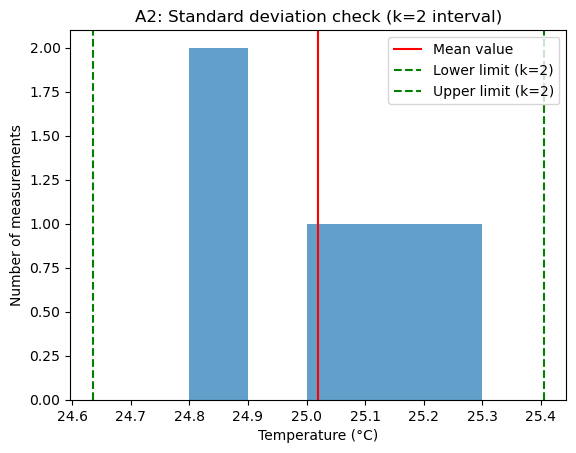

Standard deviation = 0.19 °C


In [9]:
data = [24.8, 25.0, 25.3, 24.9, 25.1]
mean = np.mean(data)
std = np.std(data, ddof=1)

plt.hist(data, bins=5, alpha=0.7)
plt.axvline(mean, color='r', label="Mean value")
plt.axvline(mean-2*std, color='g', linestyle='--', label="Lower limit (k=2)")
plt.axvline(mean+2*std, color='g', linestyle='--', label="Upper limit (k=2)")
plt.legend()
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of measurements")
plt.title("A2: Standard deviation check (k=2 interval)")
plt.show()

print("Standard deviation =", round(std, 2), "°C")

**Interpretation:** The standard deviation is 0.19 °C. With k=2 (±2·std, ~95% range), all thermometer readings are inside the green lines. This shows reproducibility and that the spread between devices is small.


c) Do these results demonstrate repeatability or reproducibility? Why?

This shows **reproducibility**, because the variation comes from several instruments.

d) If you were the manufacturer, how would you write a datasheet specification for “typical accuracy” of this batch?

A good datasheet could say **“Typical accuracy: ±0.3 °C under standard conditions.”** This value comes from the small differences (about ±0.2–0.3 °C) between the five thermometers.

### B. SPS30 air quality sensor specs

Get relevant material from https://sensirion.com/products/catalog/SPS30 and study it to get answers to following questions.

B1. What does an air quality sensor (SPS30) measure? What are the sensor outputs? What it its measurement principle, i.e. how does it work?

- The SPS30 is an air quality sensor. It measures dust particles of different sizes: PM1.0, PM2.5, PM4, PM10.
- The outputs are mass concentration (µg/m³) for PM1.0–PM10, number concentration (#/cm³) for PM0.5–PM10, and the typical particle size (TPS).
- It works with the laser scattering method: a laser shines through the air, particles scatter the light, and the sensor calculates their concentration.

B2. What is the reported accuracy of these measurements? Determine repeatability and reproducibility uncertainties.

- The SPS30 accuracy depends on particle size. For PM1.0 and PM2.5 it is about ±(5 µg/m³ + 5% of value) up to 100 µg/m³, and ±10% from 100–1000 µg/m³. For PM4 and PM10 it is about ±25 µg/m³ up to 100 µg/m³, and ±25% above that.
- The datasheet does not give separate numbers for repeatability.
For reproducibility (device-to-device variation), the datasheet’s precision specs apply (e.g., for PM2.5: ±(5 µg/m³ + 5%) up to 100 µg/m³, and ±10% above).

B3. How does the measurement accuracy relate to typical air quality conditions in Turku city center? Can it measure those conditions reliably?

- In Turku city center, PM2.5 levels are usually below 50 µg/m³. The SPS30 accuracy in this range is about ±(5 µg/m³ + 5%), so the error is small compared to the actual values. This means the accuracy is good enough for the air quality conditions found in Turku.
- Typical PM2.5 in Turku is below ~50 µg/m³; SPS30 uncertainty in that range (±(5 µg/m³ + 5%)) is small enough → reliably measurable.

### C. Case resistor tolerance

When you buy electronic components like resistors, their resistance values are within tolerance limits like 1kohm 1%. How does that tolerance relate to reporting uncertainty using coverage factors (k=1 etc)? Also check this source https://lambdafox.com/resistor-tolerances/

Tolerance is the wide limit from the factory, like ±1% or ±5%. Reporting uncertainty with k (k=1, k=2, …) is the real spread you see when you measure many resistors. The article showed that the real spread was much smaller than the tolerance (for 1% resistors about ±0.3% at k=2). This means tolerance is a safe guarantee, while uncertainty tells the true variation, which is usually tighter.